# **Final Python Notebook 2**
*   Author - C.M.M.S Silva
*   IIT ID - 20230183
*   UoW ID - w2053190




In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [96]:
# Load the preprocessed dataset (from Notebook 1)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_preprocessed_data.csv')

In [97]:
# Check the first few rows of the data
print(data.head())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.730769  Female      T1      N1       IIA      Poorly differentiated   
1  0.384615  Female      T2      N2      IIIA  Moderately differentiated   
2  0.538462  Female      T3      N3      IIIC  Moderately differentiated   
3  0.538462  Female      T1      N1       IIA      Poorly differentiated   
4  0.326923  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  \
0                0.696970          

In [98]:
print(data.columns)

Index(['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')


In [99]:
print(data.shape)

(4023, 15)


In [100]:
# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

In [101]:
# Define features and target variable
X = data.drop(columns=['Mortality_Status'])
y = data['Mortality_Status']

In [102]:
# Standardize the feature set
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [104]:
# Model 1: Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       682
           1       0.39      0.50      0.44       123

    accuracy                           0.80       805
   macro avg       0.65      0.68      0.66       805
weighted avg       0.83      0.80      0.81       805



In [105]:
# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=2000, solver='saga')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       682
           1       0.78      0.44      0.56       123

    accuracy                           0.90       805
   macro avg       0.84      0.71      0.75       805
weighted avg       0.89      0.90      0.88       805



In [106]:
# Model 3: K-Nearest Neighbours
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbours Classification Report:")
print(classification_report(y_test, knn_predictions))

K-Nearest Neighbours Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       682
           1       0.66      0.35      0.46       123

    accuracy                           0.87       805
   macro avg       0.78      0.66      0.69       805
weighted avg       0.86      0.87      0.86       805



In [107]:
# Store the scores for KNN
knn_report = classification_report(y_test, knn_predictions, output_dict=True)
knn_accuracy = knn_report['accuracy']
knn_precision = knn_report['weighted avg']['precision']
knn_recall = knn_report['weighted avg']['recall']
knn_f1 = knn_report['weighted avg']['f1-score']

# Store the scores for Naive Bayes
nb_report = classification_report(y_test, nb_predictions, output_dict=True)
nb_accuracy = nb_report['accuracy']
nb_precision = nb_report['weighted avg']['precision']
nb_recall = nb_report['weighted avg']['recall']
nb_f1 = nb_report['weighted avg']['f1-score']

# Store the scores for Logistic Regression
lr_report = classification_report(y_test, lr_predictions, output_dict=True)
lr_accuracy = lr_report['accuracy']
lr_precision = lr_report['weighted avg']['precision']
lr_recall = lr_report['weighted avg']['recall']
lr_f1 = lr_report['weighted avg']['f1-score']

nb_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
knn_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Create a pandas DataFrame for the table
import pandas as pd
data = {
    'Model': ['Naïve Bayes', 'Logistic Regression', 'K-Nearest Neighbours'],
    'Accuracy': [nb_accuracy, lr_accuracy, knn_accuracy],
    'Precision': [nb_precision, lr_precision, knn_precision],
    'Recall': [nb_recall, lr_recall, knn_recall],
    'F1-Score': [nb_f1, lr_f1, knn_f1],
    'AUC-ROC': [nb_auc, lr_auc, knn_auc]
}
df = pd.DataFrame(data)
print(df)

                  Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0           Naïve Bayes  0.803727   0.825511  0.803727  0.813135  0.782216
1   Logistic Regression  0.895652   0.887358  0.895652  0.882965  0.846244
2  K-Nearest Neighbours  0.873292   0.856695  0.873292  0.856331  0.769091


In [108]:
# Confusion matrices and ROC curves
models = {'Naïve Bayes': nb_model, 'Logistic Regression': lr_model, 'K-Nearest Neighbours': knn_model}
for name, model in models.items():
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    print(f'Confusion Matrix for {name} Model:\n', cm)

Confusion Matrix for Naïve Bayes Model:
 [[586  96]
 [ 62  61]]
Confusion Matrix for Logistic Regression Model:
 [[667  15]
 [ 69  54]]
Confusion Matrix for K-Nearest Neighbours Model:
 [[660  22]
 [ 80  43]]


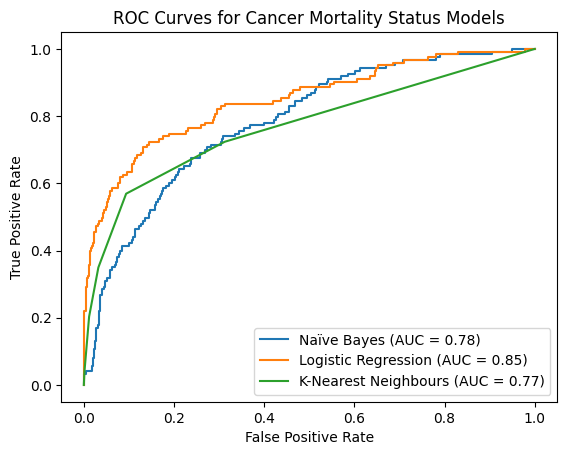

In [109]:
# ROC Curves
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cancer Mortality Status Models')
plt.legend()
plt.show()

In [110]:
# Hyperparameter tuning with GridSearchCV for Logistic Regression
param_grid = {'penalty': ['l1', 'l2'],'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga'] }
grid_search = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Best Logistic Regression parameters: {grid_search.best_params_}')

Best Logistic Regression parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [111]:
# Evaluate the tuned lr model
best_lr_model = grid_search.best_estimator_
best_lr_predictions = best_lr_model.predict(X_test)
print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, best_lr_predictions))

Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       682
           1       0.78      0.44      0.56       123

    accuracy                           0.90       805
   macro avg       0.84      0.71      0.75       805
weighted avg       0.89      0.90      0.88       805



In [112]:
# Confusion matrices and ROC curves after Hyperparameter Tuning
models = {'Naïve Bayes': nb_model, 'Tuned Logistic Regression': best_lr_model, 'K Nearest Neighbours': knn_model}
for name, model in models.items():
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    print(f'Confusion Matrix for {name} Model:\n', cm)

Confusion Matrix for Naïve Bayes Model:
 [[586  96]
 [ 62  61]]
Confusion Matrix for Tuned Logistic Regression Model:
 [[667  15]
 [ 69  54]]
Confusion Matrix for K Nearest Neighbours Model:
 [[660  22]
 [ 80  43]]


In [113]:
# Store the scores for tuned Logistic Regression
lr_report = classification_report(y_test, best_lr_predictions, output_dict=True)
lr_accuracy = lr_report['accuracy']
lr_precision = lr_report['weighted avg']['precision']
lr_recall = lr_report['weighted avg']['recall']
lr_f1 = lr_report['weighted avg']['f1-score']

lr_auc = roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])

import pandas as pd
data = {
    'Model': ['Logistic Regression'],
    'Accuracy': [lr_accuracy],
    'Precision': [lr_precision],
    'Recall': [lr_recall],
    'F1-Score': [lr_f1],
    'AUC-ROC': [lr_auc]
}
df = pd.DataFrame(data)
print(df)

                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.895652   0.887358  0.895652  0.882965  0.846744
